In [ ]:
# Importing and essential library panadas for data manipulation, numpy for numerical computation, matplotlib for visualization and for advanced visualization seaborn library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the dataset. The dataset contain restaurant data .
df = pd.read_csv("/content/drive/MyDrive/Copy of Dataset .csv")

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
#Show number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print()

Number of rows: 9551
Number of columns: 21



In [ ]:
# 3. Show column names and data types
print("Columns and their types:")
print(df.dtypes)
print()

Columns and their types:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object



In [ ]:
# Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())
print()

Missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64



In [ ]:
# Handle missing values (simple way)
# For 'Cuisines' column (has missing values), fill with 'Unknown'
df['Cuisines'] = df['Cuisines'].fillna('Unknown')

In [ ]:
# - Drop rows where important columns like rating are missing (if any)
df = df.dropna(subset=['Aggregate rating'])

In [ ]:
# Confirm no critical missing values left
print("Missing values after cleaning:")
print(df[['Cuisines', 'Aggregate rating']].isnull().sum())
print()

Missing values after cleaning:
Cuisines            0
Aggregate rating    0
dtype: int64



In [ ]:
# Convert data types if needed
# Make sure 'Average Cost for two' is numeric
df['Average Cost for two'] = pd.to_numeric(df['Average Cost for two'], errors='coerce')

In [ ]:
# Analyze the target variable: Aggregate rating
print("Distribution of Aggregate rating:")
print(df['Aggregate rating'].describe())
print()

Distribution of Aggregate rating:
count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64



In [ ]:
# Count how many restaurants in each rating group
print("Count of each rating value:")
print(df['Aggregate rating'].value_counts().sort_index())
print()

Count of each rating value:
Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64



In [ ]:
# Check for class imbalance
rating_counts = df['Aggregate rating'].value_counts()
print("Is there class imbalance?")
if (rating_counts.max() / rating_counts.min()) > 10:
    print("Yes, big imbalance!")
else:
    print("No major imbalance.")

Is there class imbalance?
Yes, big imbalance!


In [ ]:
# Descriptive Analysis
# stats for numerical columns
print("1. STATISTICS FOR NUMERICAL COLUMNS")

1. STATISTICS FOR NUMERICAL COLUMNS


In [ ]:
# Choosing only columns that are really numbers
num_cols = ['Average Cost for two', 'Aggregate rating', 'Votes']

for col in num_cols:
    print(f"{col}:")
    print(f"   Mean   = {df[col].mean():.2f}")
    print(f"   Median = {df[col].median():.2f}")
    print(f"   Std    = {df[col].std():.2f}")
    print(f"   Min    = {df[col].min()}, Max = {df[col].max()}")
    print()

Average Cost for two:
   Mean   = 1199.21
   Median = 400.00
   Std    = 16121.18
   Min    = 0, Max = 800000

Aggregate rating:
   Mean   = 2.67
   Median = 3.20
   Std    = 1.52
   Min    = 0.0, Max = 4.9

Votes:
   Mean   = 156.91
   Median = 31.00
   Std    = 430.17
   Min    = 0, Max = 10934



In [ ]:
#Price range is categorical, show counts
print("Price range (categorical):")
print(df['Price range'].value_counts().sort_index())
print()

Price range (categorical):
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64



In [ ]:
# Country Code
print("Top 5 Country Codes:")
print(df['Country Code'].value_counts().head())
print()

Top 5 Country Codes:
Country Code
1      8652
216     434
215      80
30       60
189      60
Name: count, dtype: int64



In [ ]:
# City
print("Top 10 Cities with most restaurants:")
print(df['City'].value_counts().head(10))
print()

Top 10 Cities with most restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64



In [ ]:
# Cuisines (split multiple values)
print("Top 10 Cuisines (after splitting):")
cuisines_series = df['Cuisines'].str.split(', ', expand=True).stack()
top_cuisines = cuisines_series.value_counts().head(10)
print(top_cuisines)
print()

Top 10 Cuisines (after splitting):
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64



In [ ]:
print("TOP 5 CITIES WITH MOST RESTAURANTS:")
top_cities = df['City'].value_counts().head(5)
for city, count in top_cities.items():
    print(f"{city}: {count} restaurants")
print()

TOP 5 CITIES WITH MOST RESTAURANTS:
   New Delhi: 5473 restaurants
   Gurgaon: 1118 restaurants
   Noida: 1080 restaurants
   Faridabad: 251 restaurants
   Ghaziabad: 25 restaurants



In [ ]:
print("TOP 5 MOST POPULAR CUISINES:")
for cuisine, count in top_cuisines.head(5).items():
    print(f"   {cuisine}: {count} times")
print()

TOP 5 MOST POPULAR CUISINES:
   North Indian: 3960 times
   Chinese: 2735 times
   Fast Food: 1986 times
   Mughlai: 995 times
   Italian: 764 times



1. PLOTTING RESTAURANTS ON MAP...


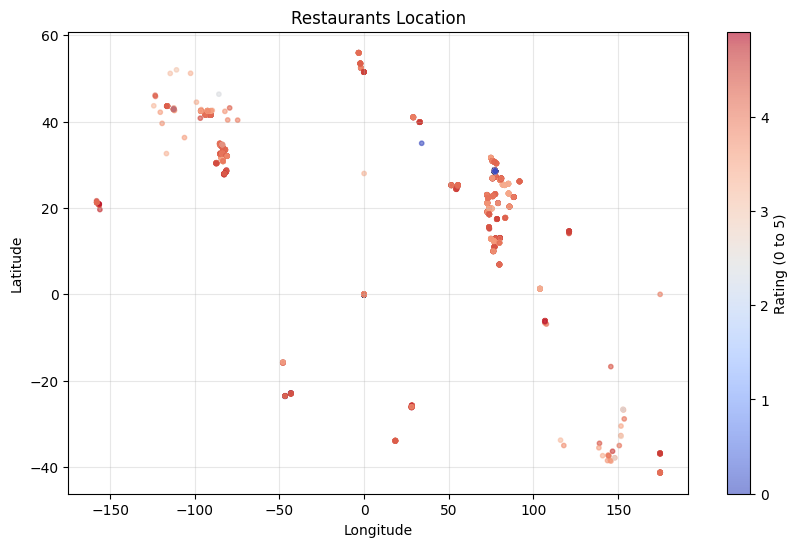

In [ ]:
# Plot restaurants using Latitude & Longitude
print("1. PLOTTING RESTAURANTS ON MAP...")
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'],
            c=df['Aggregate rating'], cmap='coolwarm',
            s=10, alpha=0.6)
plt.colorbar(label='Rating (0 to 5)')
plt.title("Restaurants Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, alpha=0.3)
plt.show()


2. DISTRIBUTION OF RESTAURANTS


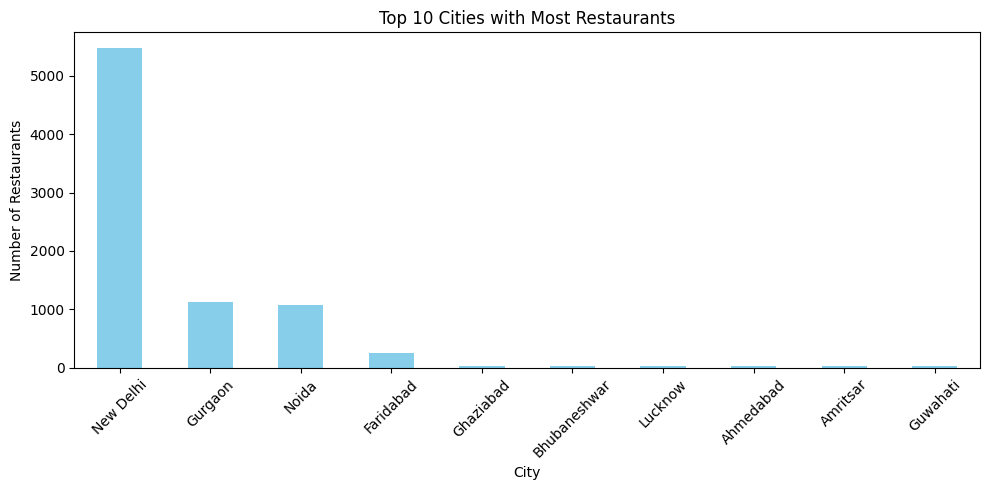

In [ ]:
# DISTRIBUTION: Restaurants by City & Country
print("\nDISTRIBUTION OF RESTAURANTS")

# Top 10 cities
top_cities = df['City'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_cities.plot(kind='bar', color='skyblue')
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

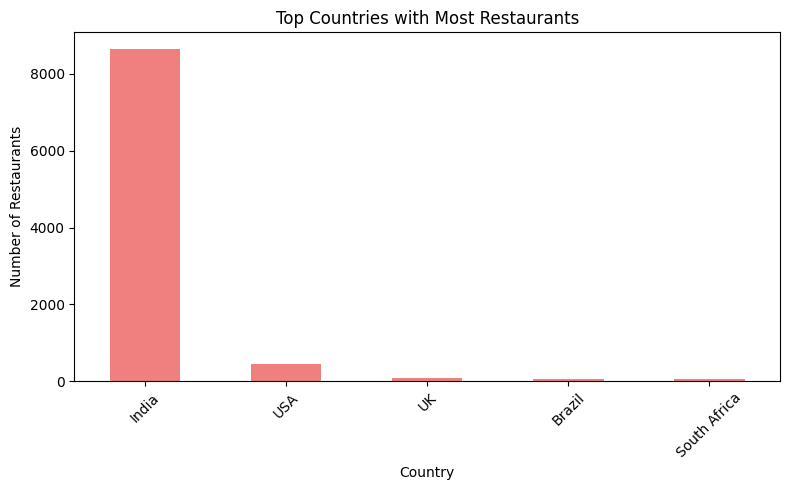

In [ ]:
# Top countries
top_countries = df['Country Code'].value_counts().head(5)
country_names = {1: 'India', 14: 'Australia', 30: 'Brazil', 162: 'Philippines', 184: 'South Africa',
                 189: 'South Africa', 191: 'Sri Lanka', 208: 'Turkey', 214: 'UAE', 215: 'UK', 216: 'USA'}
top_countries.index = top_countries.index.map(country_names)

plt.figure(figsize=(8, 5))
top_countries.plot(kind='bar', color='lightcoral')
plt.title("Top Countries with Most Restaurants")
plt.xlabel("Country")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# CORRELATION: Location vs Rating
print("\n3. CHECKING IF LOCATION AFFECTS RATING")

# Group by City and get average rating
city_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
top10_good = city_rating.head(10)
top10_bad = city_rating.tail(10)

print("Top 10 cities with HIGHEST average rating:")
print(top10_good)
print("\nTop 10 cities with LOWEST average rating:")
print(top10_bad)


3. CHECKING IF LOCATION AFFECTS RATING
Top 10 cities with HIGHEST average rating:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Secunderabad        4.500000
Lincoln             4.500000
Name: Aggregate rating, dtype: float64

Top 10 cities with LOWEST average rating:
City
Consort        3.000000
Mayfield       2.900000
Ghaziabad      2.852000
Gurgaon        2.651431
Paynesville    2.600000
New Delhi      2.438845
Montville      2.400000
Mc Millan      2.400000
Noida          2.036204
Faridabad      1.866932
Name: Aggregate rating, dtype: float64


In [ ]:
# correlation between latitude/longitude and rating
corr_lat = df['Latitude'].corr(df['Aggregate rating'])
corr_lon = df['Longitude'].corr(df['Aggregate rating'])

print(f"\nCorrelation between Latitude and Rating: {corr_lat:.3f}")
print(f"Correlation between Longitude and Rating: {corr_lon:.3f}")

if abs(corr_lat) > 0.3 or abs(corr_lon) > 0.3:
    print("There is SOME relationship between location and rating.")
else:
    print("Location does NOT strongly affect rating.")


Correlation between Latitude and Rating: 0.001
Correlation between Longitude and Rating: -0.117
Location does NOT strongly affect rating.


In [ ]:
# Percentage of restaurants with Table Booking
total = len(df)

booking_yes = df['Has Table booking'].value_counts().get('Yes', 0)
booking_percent = (booking_yes / total) * 100

print(f"1. TABLE BOOKING")
print(f"   Restaurants with table booking : {booking_yes}")
print(f"   Percentage                    : {booking_percent:.2f}%")
print()

1. TABLE BOOKING
   Restaurants with table booking : 1158
   Percentage                    : 12.12%



In [ ]:
# Percentage with Online Delivery
delivery_yes = df['Has Online delivery'].value_counts().get('Yes', 0)
delivery_percent = (delivery_yes / total) * 100

print(f"2. ONLINE DELIVERY")
print(f"   Restaurants with online delivery : {delivery_yes}")
print(f"   Percentage                       : {delivery_percent:.2f}%")
print()

2. ONLINE DELIVERY
   Restaurants with online delivery : 2451
   Percentage                       : 25.66%



In [ ]:
# 3. Average rating: With vs Without Table Booking
rating_with_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
rating_without_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

print(f"3. AVERAGE RATINGS")
print(f"   With Table Booking    : {rating_with_booking:.2f}")
print(f"   Without Table Booking : {rating_without_booking:.2f}")
print(f"   Difference            : {rating_with_booking - rating_without_booking:.2f}")
print()

3. AVERAGE RATINGS
   With Table Booking    : 3.44
   Without Table Booking : 2.56
   Difference            : 0.88



In [ ]:
# 4. Online Delivery by Price Range
print(f"4. ONLINE DELIVERY BY PRICE RANGE")

# Group by Price range and count online delivery
delivery_by_price = df.groupby('Price range')['Has Online delivery'].value_counts().unstack().fillna(0)
delivery_by_price['Total'] = delivery_by_price['Yes'] + delivery_by_price['No']
delivery_by_price['% Online Delivery'] = (delivery_by_price['Yes'] / delivery_by_price['Total']) * 100

4. ONLINE DELIVERY BY PRICE RANGE


In [ ]:
# Show results
for price in sorted(delivery_by_price.index):
    total_rest = int(delivery_by_price.loc[price, 'Total'])
    yes_del = int(delivery_by_price.loc[price, 'Yes'])
    percent = delivery_by_price.loc[price, '% Online Delivery']
    print(f"   Price Range {price}: {yes_del}/{total_rest} have online delivery ({percent:.1f}%)")

print()

   Price Range 1: 701/4444 have online delivery (15.8%)
   Price Range 2: 1286/3113 have online delivery (41.3%)
   Price Range 3: 411/1408 have online delivery (29.2%)
   Price Range 4: 53/586 have online delivery (9.0%)



In [ ]:
#  Most common Price Range
print("1. MOST COMMON PRICE RANGE")
price_counts = df['Price range'].value_counts()
most_common = price_counts.idxmax()
most_common_count = price_counts.max()

print(f"   Price Range {most_common} is the most common")
print(f"   → Appears {most_common_count} times")
print()

1. MOST COMMON PRICE RANGE
   Price Range 1 is the most common
   → Appears 4444 times



In [ ]:
# Average rating for each Price Range
print("2. AVERAGE RATING BY PRICE RANGE")
avg_rating = df.groupby('Price range')['Aggregate rating'].mean()

for price in sorted(avg_rating.index):
    rating = avg_rating[price]
    print(f"   Price Range {price}: Average Rating = {rating:.2f}")

2. AVERAGE RATING BY PRICE RANGE
   Price Range 1: Average Rating = 2.00
   Price Range 2: Average Rating = 2.94
   Price Range 3: Average Rating = 3.68
   Price Range 4: Average Rating = 3.82


In [ ]:
# Price range with HIGHEST average rating
best_price = avg_rating.idxmax()
best_rating = avg_rating.max()

print("3. HIGHEST AVERAGE RATING")
print(f"   Price Range {best_price} has the highest rating: {best_rating:.2f}")

3. HIGHEST AVERAGE RATING
   Price Range 4 has the highest rating: 3.82


In [ ]:
# Map price to rating color (from dataset)
color_map = {1: 'White', 2: 'Red', 3: 'Orange', 4: 'Yellow', 5: 'Green', 6: 'Dark Green'}
# But in this dataset, Rating color is based on Aggregate rating, not price
# So we use the average rating to guess the color

if best_rating >= 4.5:
    best_color = 'Dark Green'
elif best_rating >= 4.0:
    best_color = 'Green'
elif best_rating >= 3.5:
    best_color = 'Yellow'
elif best_rating >= 3.0:
    best_color = 'Orange'
elif best_rating > 0:
    best_color = 'Red'
else:
    best_color = 'White'

print(f"   → Color: {best_color}")

   → Color: Yellow


In [ ]:
print("FEATURE ENGINEERING STARTED")

FEATURE ENGINEERING STARTED


In [ ]:
# Extract new feature from existing columns
# Length of Restaurant Name
df['Name Length'] = df['Restaurant Name'].str.len()

In [ ]:
# Length of Address
df['Address Length'] = df['Address'].str.len()

In [ ]:
# Number of Cuisines (split by comma)
df['Num Cuisines'] = df['Cuisines'].str.split(', ').str.len()

print("Created: Name Length, Address Length, Num Cuisines")
print()

   Created: Name Length, Address Length, Num Cuisines



In [ ]:
#Encode categorical variables (Yes/No to 0/1)
# Has Table Booking (Yes=1, No=0)
df['Has Table Booking'] = (df['Has Table booking'] == 'Yes').astype(int)

In [ ]:
# Has Online Delivery (Yes=1, No=0)
df['Has Online Delivery'] = (df['Has Online delivery'] == 'Yes').astype(int)

# Price Range is already numeric, but confirm
print("   Encoded: Has Table Booking (0/1), Has Online Delivery (0/1)")
print()

   Encoded: Has Table Booking (0/1), Has Online Delivery (0/1)



In [ ]:
# 3. Show sample of new features
print("SAMPLE OF NEW FEATURES")
sample_cols = ['Restaurant Name', 'Name Length', 'Has Table Booking', 'Has Online Delivery', 'Num Cuisines']
print(df[sample_cols].head())


SAMPLE OF NEW FEATURES
          Restaurant Name  Name Length  Has Table Booking  \
0        Le Petit Souffle           16                  1   
1        Izakaya Kikufuji           16                  1   
2  Heat - Edsa Shangri-La           22                  1   
3                    Ooma            4                  0   
4             Sambo Kojin           11                  1   

   Has Online Delivery  Num Cuisines  
0                    0             3  
1                    0             1  
2                    0             4  
3                    0             2  
4                    0             2  


In [ ]:
print("PREDICTIVE MODELING STARTED")

PREDICTIVE MODELING STARTED


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Prepare features and target
# Features we will use
features = ['Average Cost for two', 'Price range', 'Votes',
            'Has Table Booking', 'Has Online Delivery',
            'Name Length', 'Address Length', 'Num Cuisines']

X = df[features]
y = df['Aggregate rating']

print(f"Using {len(features)} features to predict rating")

Using 8 features to predict rating


In [ ]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training on {len(X_train)} restaurants")
print(f"Testing on {len(X_test)} restaurants")
print()

Training on 7640 restaurants
Testing on 1911 restaurants



In [ ]:
# Try 3 models and compare
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
print("MODEL PERFORMANCE")


for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    mae  = mean_absolute_error(y_test, y_pred)
    rms  = rmse(y_test, y_pred)
    r2   = r2_score(y_test, y_pred)

    # <-- NOTE: we store the short key "R2"
    results.append({'Model': name, 'MAE': mae, 'RMSE': rms, 'R2': r2})

    print(f"{name}:")
    print(f"   MAE  = {mae:.3f}")
    print(f"   RMSE = {rms:.3f}")
    print(f"   R2   = {r2:.3f}")


MODEL PERFORMANCE
Linear Regression:
   MAE  = 1.078
   RMSE = 1.292
   R2   = 0.267
Decision Tree:
   MAE  = 0.306
   RMSE = 0.475
   R2   = 0.901
Random Forest:
   MAE  = 0.218
   RMSE = 0.335
   R2   = 0.951


In [ ]:
# Best model
res_df = pd.DataFrame(results)
best = res_df.loc[res_df['R2'].idxmax()]

print("BEST MODEL")
print("-"*50)
print(f"best_model : {best['Model']}")
print(f"   R2   = {best['R2']:.3f}")
print(f"   MAE  = {best['MAE']:.3f}")
## As we can see here the best model is random forest with 95% accuracy.


BEST MODEL
--------------------------------------------------
best_model : Random Forest
   R2   = 0.951
   MAE  = 0.218


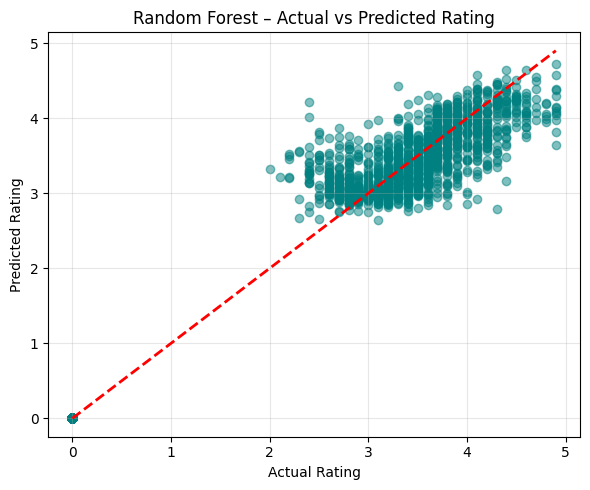

In [ ]:
#Plot the best model’s predictions
best_name = best['Model']
best_model = models[best_name]
best_model.fit(X_train, y_train)          # retrain on full train set
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_best, alpha=0.5, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title(f"{best_name} – Actual vs Predicted Rating")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
print("CUSTOMER PREFERENCE ANALYSIS")

CUSTOMER PREFERENCE ANALYSIS


In [ ]:
print("SPLITTING CUISINES...")
cuisines_split = df['Cuisines'].str.split(', ', expand=True).stack()
cuisines_split = cuisines_split.reset_index(level=1, drop=True)
cuisine_df = pd.DataFrame(cuisines_split, columns=['Cuisine'])

SPLITTING CUISINES...


In [ ]:
cuisine_df['Rating'] = df['Aggregate rating'].repeat(df['Cuisines'].str.count(', ')+1).values
cuisine_df['Votes'] = df['Votes'].repeat(df['Cuisines'].str.count(', ')+1).values

print(f"   Total cuisine entries: {len(cuisine_df)}")

   Total cuisine entries: 19719


In [ ]:
# Most popular cuisines by VOTES
print(" MOST POPULAR CUISINES (by total votes)")

pop_cuisines = cuisine_df.groupby('Cuisine')['Votes'].sum().sort_values(ascending=False)
top10_votes = pop_cuisines.head(10)

for cuisine, votes in top10_votes.items():
    print(f"   {cuisine}: {votes:,} votes")

 MOST POPULAR CUISINES (by total votes)
--------------------------------------------------
   North Indian: 595,981 votes
   Chinese: 364,351 votes
   Italian: 329,265 votes
   Continental: 288,255 votes
   Fast Food: 184,058 votes
   American: 183,117 votes
   Cafe: 177,568 votes
   Mughlai: 151,946 votes
   Desserts: 105,889 votes
   Asian: 104,303 votes


In [ ]:
#Highest rated cuisines
print("3. CUISINES WITH HIGHEST AVERAGE RATING")


rating_cuisines = cuisine_df.groupby('Cuisine')['Rating'].mean().sort_values(ascending=False)
top10_rating = rating_cuisines.head(10)

for cuisine, rating in top10_rating.items():
    count = cuisine_df[cuisine_df['Cuisine'] == cuisine].shape[0]
    print(f"   {cuisine}: {rating:.2f} stars (from {count} restaurants)")

3. CUISINES WITH HIGHEST AVERAGE RATING
--------------------------------------------------
   Sunda: 4.90 stars (from 3 restaurants)
   B�_rek: 4.70 stars (from 1 restaurants)
   Taiwanese: 4.65 stars (from 2 restaurants)
   Ramen: 4.50 stars (from 2 restaurants)
   Dim Sum: 4.47 stars (from 3 restaurants)
   Hawaiian: 4.41 stars (from 8 restaurants)
   D�_ner: 4.40 stars (from 1 restaurants)
   Bubble Tea: 4.40 stars (from 1 restaurants)
   Curry: 4.40 stars (from 6 restaurants)
   Kebab: 4.38 stars (from 10 restaurants)


In [ ]:
#Relationship: Cuisine vs Rating (Top 10 popular)
print("RATING OF TOP 10 POPULAR CUISINES")


for cuisine in top10_pop.index[:10]:
    avg_rating = cuisine_df[cuisine_df['Cuisine'] == cuisine]['Rating'].mean()
    count = cuisine_df[cuisine_df['Cuisine'] == cuisine].shape[0]
    print(f"   {cuisine}: {avg_rating:.2f} stars (from {count} places)")


4. RATING OF TOP 10 POPULAR CUISINES
--------------------------------------------------
   North Indian: 2.51 stars (from 3960 places)
   Chinese: 2.62 stars (from 2735 places)
   Italian: 3.56 stars (from 764 places)
   Continental: 3.52 stars (from 736 places)
   Fast Food: 2.56 stars (from 1986 places)
   American: 3.66 stars (from 390 places)
   Cafe: 3.32 stars (from 703 places)
   Mughlai: 2.61 stars (from 995 places)
   Desserts: 2.98 stars (from 653 places)
   Asian: 3.82 stars (from 233 places)


In [ ]:
# Final Insights
print("FINAL INSIGHTS")
print("-"*50)
print(f"Most VOTED cuisine  : {top10_votes.index[0]}")
print(f"Best RATED cuisine  : {top10_rating.index[0]} ({top10_rating.iloc[0]:.2f} stars)")

FINAL INSIGHTS
--------------------------------------------------
Most VOTED cuisine  : North Indian
Best RATED cuisine  : Sunda (4.90 stars)


In [ ]:
print("DATA VISUALIZATION")

DATA VISUALIZATION


Text(0, 0.5, 'Number of Restaurants')

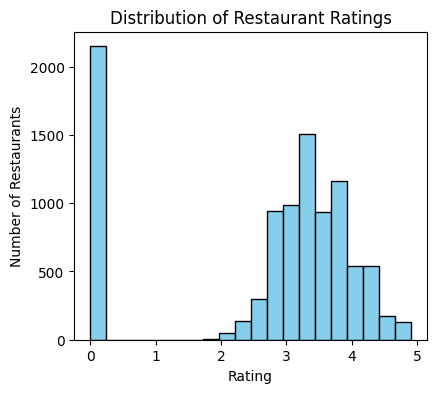

In [ ]:
# DISTRIBUTION OF RATINGS (Histogram + Boxplot)
plt.figure(figsize=(10, 4))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['Aggregate rating'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")

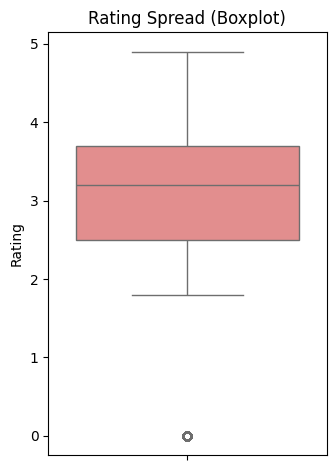

In [ ]:
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Aggregate rating'], color='lightcoral')
plt.title("Rating Spread (Boxplot)")
plt.ylabel("Rating")

plt.tight_layout()
plt.show()

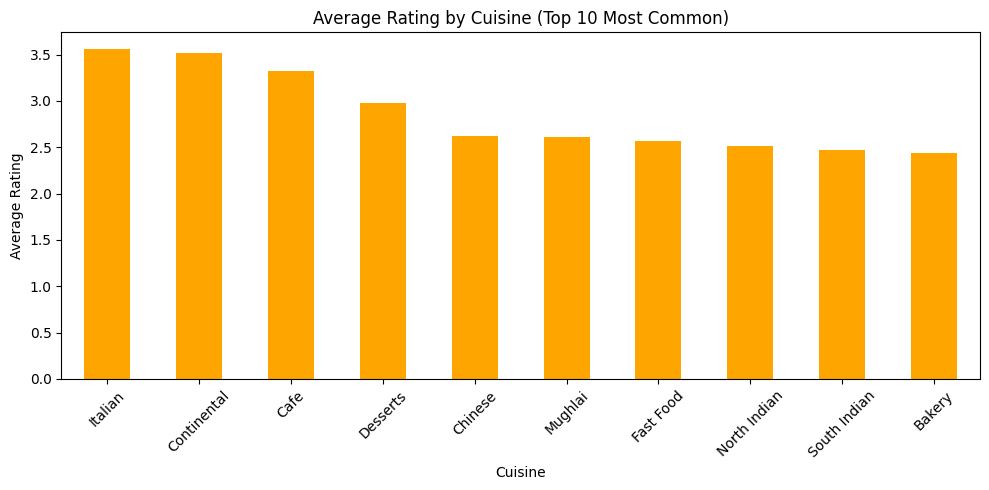

In [ ]:
# Top 10 cuisines by count
top_cuisines = cuisine_df['Cuisine'].value_counts().head(10).index
top_data = cuisine_df[cuisine_df['Cuisine'].isin(top_cuisines)]

# Average rating per cuisine
avg_by_cuisine = top_data.groupby('Cuisine')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
avg_by_cuisine.plot(kind='bar', color='orange')
plt.title("Average Rating by Cuisine (Top 10 Most Common)")
plt.ylabel("Average Rating")
plt.xlabel("Cuisine")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

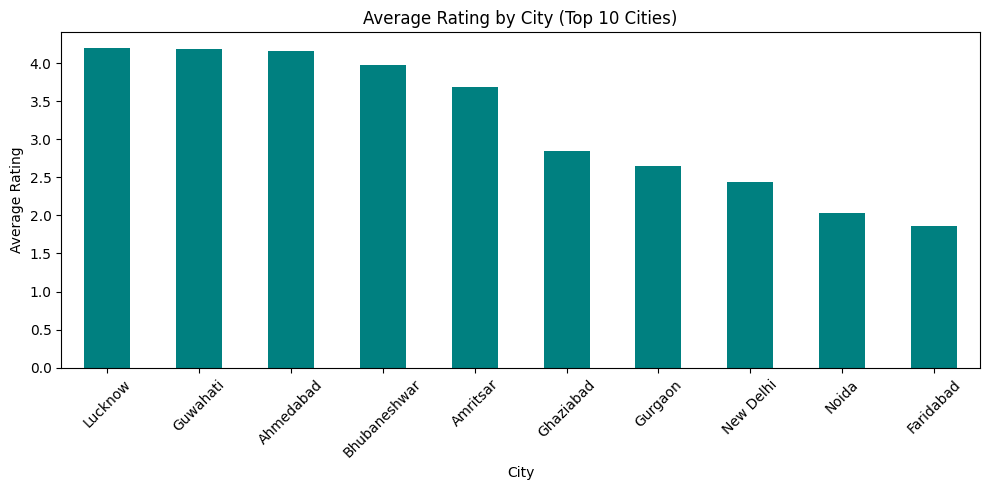

In [ ]:
# AVERAGE RATING BY CITY (Top 10 cities)
top_cities = df['City'].value_counts().head(10).index
city_data = df[df['City'].isin(top_cities)]
avg_by_city = city_data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
avg_by_city.plot(kind='bar', color='teal')
plt.title("Average Rating by City (Top 10 Cities)")
plt.ylabel("Average Rating")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3468358569.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feat], y=df['Aggregate rating'], palette='Set2')


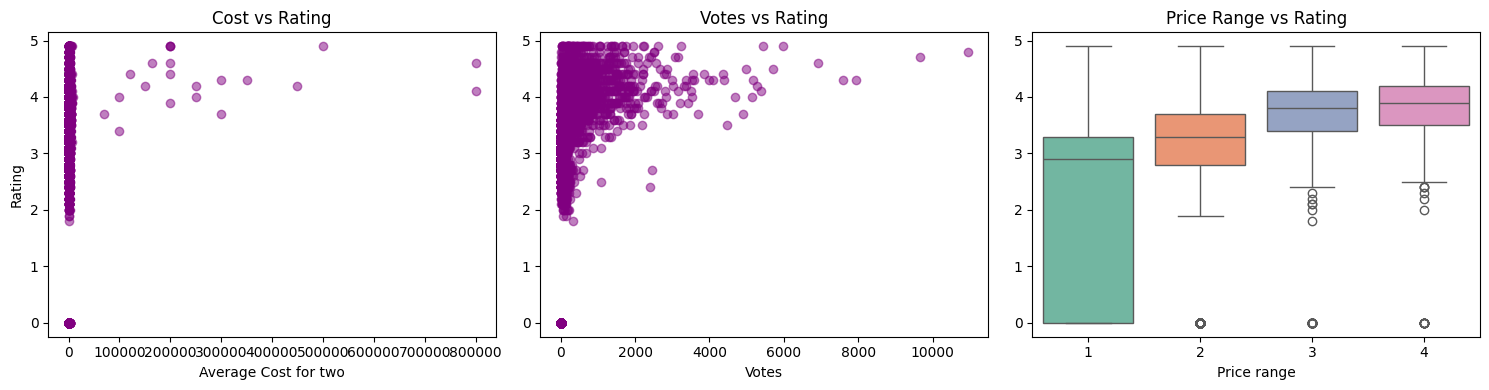

In [ ]:
# RELATIONSHIP: Features vs Rating (Scatter Plots)
features = ['Average Cost for two', 'Votes', 'Price range']
titles = ['Cost vs Rating', 'Votes vs Rating', 'Price Range vs Rating']

plt.figure(figsize=(15, 4))
for i, feat in enumerate(features):
    plt.subplot(1, 3, i+1)
    if feat == 'Price range':
        sns.boxplot(x=df[feat], y=df['Aggregate rating'], palette='Set2')
    else:
        plt.scatter(df[feat], df['Aggregate rating'], alpha=0.5, color='purple')
    plt.title(titles[i])
    plt.xlabel(feat)
    plt.ylabel("Rating" if i == 0 else "")

plt.tight_layout()
plt.show()

/tmp/ipython-input-2693495990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=df, palette='pastel')


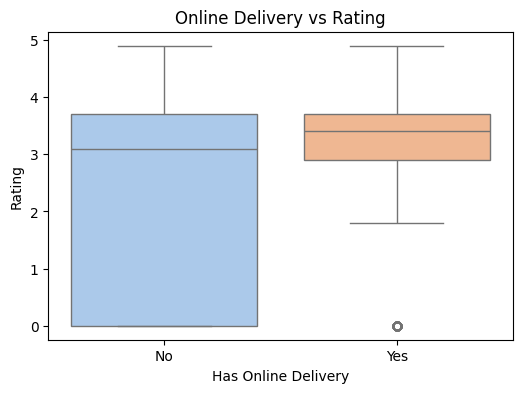

In [ ]:
# Online Delivery vs Rating
plt.figure(figsize=(6, 4))
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=df, palette='pastel')
plt.title("Online Delivery vs Rating")
plt.xlabel("Has Online Delivery")
plt.ylabel("Rating")
plt.show()